In [1]:
# load the data as `data` and lines as `lines` variable
%run helper.py {10}

In [67]:
data = """addx 15
addx -11
addx 6
addx -3
addx 5
addx -1
addx -8
addx 13
addx 4
noop
addx -1
addx 5
addx -1
addx 5
addx -1
addx 5
addx -1
addx 5
addx -1
addx -35
addx 1
addx 24
addx -19
addx 1
addx 16
addx -11
noop
noop
addx 21
addx -15
noop
noop
addx -3
addx 9
addx 1
addx -3
addx 8
addx 1
addx 5
noop
noop
noop
noop
noop
addx -36
noop
addx 1
addx 7
noop
noop
noop
addx 2
addx 6
noop
noop
noop
noop
noop
addx 1
noop
noop
addx 7
addx 1
noop
addx -13
addx 13
addx 7
noop
addx 1
addx -33
noop
noop
noop
addx 2
noop
noop
noop
addx 8
noop
addx -1
addx 2
addx 1
noop
addx 17
addx -9
addx 1
addx 1
addx -3
addx 11
noop
noop
addx 1
noop
addx 1
noop
noop
addx -13
addx -19
addx 1
addx 3
addx 26
addx -30
addx 12
addx -1
addx 3
addx 1
noop
noop
noop
addx -9
addx 18
addx 1
addx 2
noop
noop
addx 9
noop
noop
noop
addx -1
addx 2
addx -37
addx 1
addx 3
noop
addx 15
addx -21
addx 22
addx -6
addx 1
noop
addx 2
addx 1
noop
addx -10
noop
noop
addx 20
addx 1
addx 2
addx 2
addx -6
addx -11
noop
noop
noop"""


lines = [l.strip() for l in data.split("\n")]

In [2]:
i=0
x_vals = []
X = 1

def get_vals(x_vals=x_vals):
    six_signals = []
    for i in [19 + i*40 for i in range(6)]:
        six_signals.append(x_vals[i]*(i+1))
    return six_signals
    
    

for l in lines + ["noop"]:
    # print(X)
    x_vals.append(X)
    if l == "noop":
        pass
    if l.startswith("addx"):
        _, v = l.split()
        x_vals.append(X)
        X += int(v)

In [3]:
np.sum(get_vals())

14540

In [5]:
crt_shape = (6, 40)

crt = np.zeros(np.prod(crt_shape), dtype="uint8")

for i, sp in enumerate(x_vals[:-1]):
    sprite_pos = [sp-1, sp, sp+1]
    if i%40 in sprite_pos:
        crt[i] = 255

(0.0, 40.0, 6.0, 0.0)

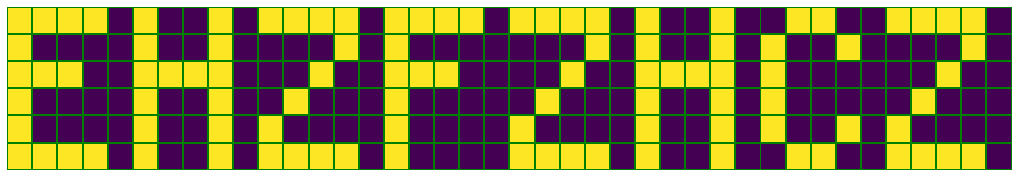

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 3))
plt.pcolormesh(crt.reshape(crt_shape), edgecolors="g")
ax = plt.gca()
ax.invert_yaxis()
plt.axis("off")